In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import os
import glob
from sklearn.svm import SVC
from skimage.feature import hog
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Rutas del dataset utilizado: INRIA
pos_dir = 'INRIAPerson/Train/pos/'
neg_dir = 'INRIAPerson/Train/neg/'

In [2]:
# Se carga el dataset, utilizando glob

pos_images = glob.glob("INRIAPerson/Train/pos/*.png")
neg_images = glob.glob("INRIAPerson/Train/neg/*.png")

In [3]:
# Carga de imagenes positivas de peatones

pos_hog_accum = []

for i in pos_images:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    # Se ajusta tamaño de imagen
    resized_img = resize(img_gray, (128,64))
    pos_hog_feature, pos_hog_img = hog(resized_img,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    pos_hog_accum.append(pos_hog_feature)

In [4]:
# Se crean variables independientes y targets (con unos, pues es la positiva)

X_pos = np.vstack(pos_hog_accum).astype(np.float64)
y_pos = np.ones(len(X_pos))

In [5]:
# Carga de imagenes negativas de peatones (no personas)

neg_hog_accum = []

for i in neg_images:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    # Se ajusta tamaño de imagen
    resized_img = resize(img_gray, (128,64))
    
    neg_hog_feature, neg_hog_img = hog(resized_img,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    neg_hog_accum.append(neg_hog_feature)

In [6]:
# Se crean variables independientes y targets (con ceros, pues es la negativa)

X_neg = np.vstack(neg_hog_accum).astype(np.float64)
y_neg = np.zeros(len(X_neg))

In [7]:
# Se concatenan variables independientes

X = np.vstack((X_pos,X_neg))
X.shape

(3328, 924)

In [8]:
# Se concatenan variables dependientes

y = np.hstack((y_pos,y_neg))
y.shape

(3328,)

In [9]:
# Se divide dataset en entrenamiento y prueba, con 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
# Se entrena modelo utilizando SVM

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [11]:
# Se genera prediccion

y_predict = svc_model.predict(X_test)

<AxesSubplot:>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

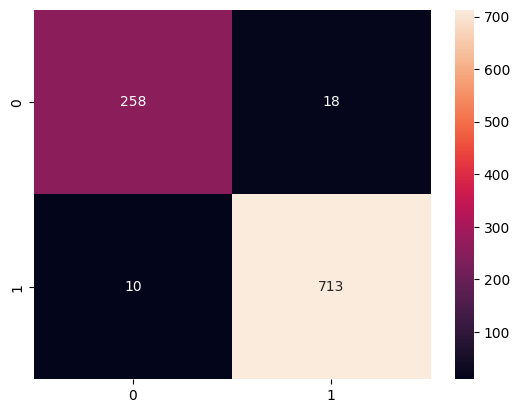

In [12]:
# Se valida matriz de confusion para mostrar efectividad del modelo

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [13]:
# Se imprime el reporte de clasificacion para validar precision y efectividad

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       276
         1.0       0.98      0.99      0.98       723

    accuracy                           0.97       999
   macro avg       0.97      0.96      0.96       999
weighted avg       0.97      0.97      0.97       999



In [14]:
# Se inicia preparacion para GridSearch

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [15]:
# Se ejecuta GridSearch

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.725 total time=   2.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   2.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   2.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   2.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   2.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.929 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.725 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.736 total time=   2.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.738 total time=   2.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.727 total time=   2.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.735 total time=   2.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.974 total time=   0.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.976 total time=   0.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.968 total time=   0.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.964 total time=   0.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.961 total time=   0.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.972 total time=   0.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [16]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [17]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

In [18]:
grid_predictions = grid.predict(X_test)

<AxesSubplot:>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexp

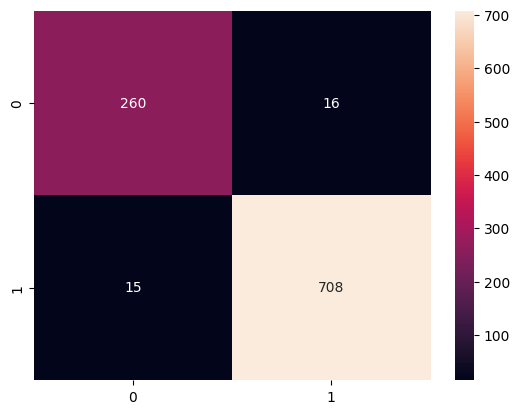

In [19]:
# Se valida matriz de confusion para mostrar efectividad del modelo

cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [20]:
# Se imprime el reporte de clasificacion para validar precision y efectividad

print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       276
         1.0       0.98      0.98      0.98       723

    accuracy                           0.97       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.97      0.97      0.97       999

